In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from keras import backend as K
np.random.seed(0)

Using TensorFlow backend.


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

def create_testdata(dataset, look_back = 1):
    dataX, dataY = [], []
    a = dataset[0:look_back, 0]
    dataX.append(a)
    dataY.append(dataset[look_back, 0])
    return np.array(dataX), np.array(dataY)


In [0]:
df = pd.read_csv("sp500.csv")
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['caldt'] =  df['caldt'].dt.strftime('%Y-%m-%d')
data = df['spindx'].values
data = data.astype('float32')
data = np.reshape(data,(-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
pred = [] # at the end, append to prediction
testVal = []
num_hidden = 8
# Look back is how many lags do we want. so look back 1 in seq = (1 2 3 4 5) will produce (2 3 4 5 6)
df.head()

,caldt,vwretd,spindx,sprtrn
0,2009-06-01,0.025957,942.87,0.025818
1,2009-06-02,0.001893,944.74,0.001983
2,2009-06-03,-0.013036,931.76,-0.013739
3,2009-06-04,0.011331,942.46,0.011484
4,2009-06-05,-0.002298,940.09,-0.002515


In [0]:
epochs = 3
look_back=5
start = time.time()
np.random.seed(0)
for i in range(10,len(data)-look_back):
    #print(i)
    train, test = data[0:i,:], data[i:i+look_back+1,]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_testdata(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    model = Sequential()
    model.add(LSTM(num_hidden,input_shape = (look_back, 1)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(trainX, trainY, epochs = epochs, batch_size = 1, verbose = 1)
    testPredict = model.predict(testX)
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    pred.append(testPredict)
    testVal.append(testY)
    K.clear_session()
    if (i - 10) % 50 == 0:
      print('Saving pred so far...')
      np.save('pred_multi2', np.asarray(pred))
end = time.time()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/3
1555/1555 [==============================] - 17s 11ms/step - loss: 0.0015
Epoch 2/3
1555/1555 [==============================] - 19s 12ms/step - loss: 8.5760e-05
Epoch 3/3
1555/1555 [==============================] - 18s 12ms/step - loss: 9.2297e-05
Epoch 1/3
1556/1556 [==============================] - 20s 13ms/step - loss: 0.0012
Epoch 2/3
1556/1556 [==============================] - 13s 9ms/step - loss: 8.6556e-05
Epoch 3/3
1556/1556 [==============================] - 11s 7ms/step - loss: 9.0628e-05
Epoch 1/3
1557/1557 [==============================] - 13s 8ms/step - loss: 5.8794e-04
Epoch 2/3
1557/1557 [==============================] - 12s 7ms/step - loss: 8.1202e-05
Epoch 3/3
1557/1557 [==============================] - 11s 7ms/step - loss: 8.6297e-05
Epoch 1/3
1558/1558 [==============================] - 14s 9ms/step - loss: 0.0058
Epoch 2/3
1558/1558 [==============================] - 1

1615/1615 [==============================] - 11s 7ms/step - loss: 1.1586e-04
Epoch 1/3
1616/1616 [==============================] - 8s 5ms/step - loss: 0.0047
Epoch 2/3
1616/1616 [==============================] - 7s 4ms/step - loss: 1.1015e-04
Epoch 3/3
1616/1616 [==============================] - 7s 5ms/step - loss: 1.1067e-04
Epoch 1/3
1617/1617 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 2/3
1617/1617 [==============================] - 8s 5ms/step - loss: 1.1327e-04
Epoch 3/3
1617/1617 [==============================] - 8s 5ms/step - loss: 1.0767e-04
Epoch 1/3
1618/1618 [==============================] - 9s 5ms/step - loss: 7.1330e-04
Epoch 2/3
1618/1618 [==============================] - 8s 5ms/step - loss: 1.0959e-04A: 0s 
Epoch 3/3
1618/1618 [==============================] - 8s 5ms/step - loss: 1.0778e-04
Epoch 1/3
1619/1619 [==============================] - 8s 5ms/step - loss: 0.0013
Epoch 2/3
1619/1619 [==============================] - 7s 5ms/step - 

1679/1679 [==============================] - 8s 5ms/step - loss: 1.1312e-04
Epoch 3/3
1679/1679 [==============================] - 7s 4ms/step - loss: 1.0676e-04
Epoch 1/3
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0069
Epoch 2/3
1680/1680 [==============================] - 8s 5ms/step - loss: 1.2615e-04
Epoch 3/3
1680/1680 [==============================] - 8s 5ms/step - loss: 1.2158e-04
Epoch 1/3
1681/1681 [==============================] - 8s 5ms/step - loss: 0.0040
Epoch 2/3
1681/1681 [==============================] - 8s 5ms/step - loss: 1.4019e-04
Epoch 3/3
1681/1681 [==============================] - 8s 5ms/step - loss: 1.1257e-04
Epoch 1/3
1682/1682 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 2/3
1682/1682 [==============================] - 8s 5ms/step - loss: 1.0871e-04
Epoch 3/3
1682/1682 [==============================] - 7s 4ms/step - loss: 1.1111e-04
Epoch 1/3
1683/1683 [==============================] - 8s 5ms/step - loss: 0

1743/1743 [==============================] - 9s 5ms/step - loss: 0.0029
Epoch 2/3
1743/1743 [==============================] - 8s 5ms/step - loss: 1.3338e-04
Epoch 3/3
1743/1743 [==============================] - 8s 5ms/step - loss: 1.3328e-04
Epoch 1/3
1744/1744 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 2/3
1744/1744 [==============================] - 8s 5ms/step - loss: 1.2378e-04
Epoch 3/3
1744/1744 [==============================] - 8s 4ms/step - loss: 1.1895e-04
Epoch 1/3
1745/1745 [==============================] - 9s 5ms/step - loss: 0.0013
Epoch 2/3
1745/1745 [==============================] - 8s 4ms/step - loss: 1.0623e-04
Epoch 3/3
1745/1745 [==============================] - 8s 4ms/step - loss: 1.0227e-04
Epoch 1/3
1746/1746 [==============================] - 8s 5ms/step - loss: 0.0037
Epoch 2/3
1746/1746 [==============================] - 7s 4ms/step - loss: 1.3986e-04
Epoch 3/3
1746/1746 [==============================] - 8s 4ms/step - loss: 1.086

1775/1775 [==============================] - 10s 6ms/step - loss: 0.0014
Epoch 2/3
1775/1775 [==============================] - 8s 4ms/step - loss: 1.0391e-04
Epoch 3/3
1775/1775 [==============================] - 10s 6ms/step - loss: 1.1145e-04
Epoch 1/3
1776/1776 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 2/3
1776/1776 [==============================] - 8s 5ms/step - loss: 1.1831e-04
Epoch 3/3
1776/1776 [==============================] - 8s 4ms/step - loss: 1.1896e-04
Epoch 1/3
1777/1777 [==============================] - 13s 7ms/step - loss: 0.0041
Epoch 2/3
1777/1777 [==============================] - 12s 7ms/step - loss: 1.1765e-04
Epoch 3/3
1777/1777 [==============================] - 13s 7ms/step - loss: 1.1439e-04
Epoch 1/3
1778/1778 [==============================] - 9s 5ms/step - loss: 0.0021A: 0s - loss: 0.00
Epoch 2/3
1778/1778 [==============================] - 8s 4ms/step - loss: 1.0324e-04
Epoch 3/3
1778/1778 [==============================] - 7s

1838/1838 [==============================] - 9s 5ms/step - loss: 1.1559e-04
Epoch 3/3
1838/1838 [==============================] - 8s 4ms/step - loss: 1.1429e-04
Epoch 1/3
1839/1839 [==============================] - 9s 5ms/step - loss: 0.0036
Epoch 2/3
1839/1839 [==============================] - 8s 4ms/step - loss: 1.0648e-04
Epoch 3/3
1839/1839 [==============================] - 8s 5ms/step - loss: 1.0729e-04
Epoch 1/3
1840/1840 [==============================] - 9s 5ms/step - loss: 0.0026
Epoch 2/3
1840/1840 [==============================] - 8s 4ms/step - loss: 1.0980e-04
Epoch 3/3
1840/1840 [==============================] - 8s 5ms/step - loss: 1.1027e-04
Epoch 1/3
1841/1841 [==============================] - 9s 5ms/step - loss: 0.0014
Epoch 2/3
1841/1841 [==============================] - 15s 8ms/step - loss: 1.1223e-04
Epoch 3/3
1841/1841 [==============================] - 12s 6ms/step - loss: 1.0838e-04
Epoch 1/3
1842/1842 [==============================] - 10s 5ms/step - loss

1902/1902 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 2/3
1902/1902 [==============================] - 7s 4ms/step - loss: 9.8335e-05
Epoch 3/3
1902/1902 [==============================] - 7s 4ms/step - loss: 9.5481e-05
Epoch 1/3
1903/1903 [==============================] - 8s 4ms/step - loss: 0.0016A: 0s - loss: 0.0
Epoch 2/3
1903/1903 [==============================] - 7s 4ms/step - loss: 1.0273e-04
Epoch 3/3
1903/1903 [==============================] - 7s 4ms/step - loss: 1.0265e-04
Epoch 1/3
1904/1904 [==============================] - 8s 4ms/step - loss: 0.0020
Epoch 2/3
1904/1904 [==============================] - 8s 4ms/step - loss: 1.3392e-04
Epoch 3/3
1904/1904 [==============================] - 7s 4ms/step - loss: 1.2159e-04
Saving pred so far...
Epoch 1/3
1905/1905 [==============================] - 8s 4ms/step - loss: 0.0018
Epoch 2/3
1905/1905 [==============================] - 7s 4ms/step - loss: 1.1277e-04
Epoch 3/3
1905/1905 [====================

1965/1965 [==============================] - 7s 4ms/step - loss: 1.0792e-04
Epoch 3/3
1965/1965 [==============================] - 7s 3ms/step - loss: 1.0529e-04
Epoch 1/3
1966/1966 [==============================] - 8s 4ms/step - loss: 0.0049
Epoch 2/3
1966/1966 [==============================] - 7s 3ms/step - loss: 1.3908e-04
Epoch 3/3
1966/1966 [==============================] - 7s 3ms/step - loss: 1.3228e-04
Epoch 1/3
1967/1967 [==============================] - 8s 4ms/step - loss: 0.0078
Epoch 2/3
1967/1967 [==============================] - 8s 4ms/step - loss: 1.3003e-04
Epoch 3/3
1967/1967 [==============================] - 8s 4ms/step - loss: 1.2709e-04
Epoch 1/3
1968/1968 [==============================] - 8s 4ms/step - loss: 0.0052A
Epoch 2/3
1968/1968 [==============================] - 7s 4ms/step - loss: 1.1812e-04
Epoch 3/3
1968/1968 [==============================] - 7s 4ms/step - loss: 1.1817e-04
Epoch 1/3
1969/1969 [==============================] - 8s 4ms/step - loss: 

2028/2028 [==============================] - 8s 4ms/step - loss: 1.1344e-04
Epoch 1/3
2029/2029 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 2/3
2029/2029 [==============================] - 8s 4ms/step - loss: 1.1131e-04
Epoch 3/3
2029/2029 [==============================] - 8s 4ms/step - loss: 1.0123e-04
Epoch 1/3
2030/2030 [==============================] - 8s 4ms/step - loss: 0.0030
Epoch 2/3
2030/2030 [==============================] - 8s 4ms/step - loss: 1.1553e-04
Epoch 3/3
2030/2030 [==============================] - 7s 4ms/step - loss: 1.2210e-04
Epoch 1/3
2031/2031 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 2/3
2031/2031 [==============================] - 8s 4ms/step - loss: 1.0851e-04
Epoch 3/3
2031/2031 [==============================] - 7s 4ms/step - loss: 1.1540e-04
Epoch 1/3
2032/2032 [==============================] - 8s 4ms/step - loss: 0.0020
Epoch 2/3
2032/2032 [==============================] - 8s 4ms/step - loss: 1.130

2092/2092 [==============================] - 8s 4ms/step - loss: 1.2184e-04
Epoch 1/3
2093/2093 [==============================] - 8s 4ms/step - loss: 0.0027
Epoch 2/3
2093/2093 [==============================] - 7s 3ms/step - loss: 1.1254e-04
Epoch 3/3
2093/2093 [==============================] - 7s 3ms/step - loss: 1.2115e-04
Epoch 1/3
2094/2094 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 2/3
2094/2094 [==============================] - 8s 4ms/step - loss: 1.1533e-04
Epoch 3/3
2094/2094 [==============================] - 8s 4ms/step - loss: 1.1899e-04
Epoch 1/3
2095/2095 [==============================] - 8s 4ms/step - loss: 0.0012
Epoch 2/3
2095/2095 [==============================] - 7s 3ms/step - loss: 1.0305e-04
Epoch 3/3
2095/2095 [==============================] - 7s 3ms/step - loss: 1.0839e-04
Epoch 1/3
2096/2096 [==============================] - 8s 4ms/step - loss: 0.0172
Epoch 2/3
2096/2096 [==============================] - 8s 4ms/step - loss: 1.699

2156/2156 [==============================] - 8s 4ms/step - loss: 1.2954e-04
Epoch 1/3
2157/2157 [==============================] - 8s 4ms/step - loss: 0.0091
Epoch 2/3
2157/2157 [==============================] - 8s 4ms/step - loss: 1.3978e-04
Epoch 3/3
2157/2157 [==============================] - 7s 3ms/step - loss: 1.3062e-04
Epoch 1/3
2158/2158 [==============================] - 8s 4ms/step - loss: 0.0040
Epoch 2/3
2158/2158 [==============================] - 7s 3ms/step - loss: 1.4044e-04
Epoch 3/3
2158/2158 [==============================] - 7s 3ms/step - loss: 1.4158e-04
Epoch 1/3
2159/2159 [==============================] - 9s 4ms/step - loss: 0.0092
Epoch 2/3
2159/2159 [==============================] - 8s 4ms/step - loss: 1.5969e-04
Epoch 3/3
2159/2159 [==============================] - 8s 4ms/step - loss: 1.5604e-04
Epoch 1/3
2160/2160 [==============================] - 8s 4ms/step - loss: 0.0085
Epoch 2/3
2160/2160 [==============================] - 8s 4ms/step - loss: 1.220

2220/2220 [==============================] - 8s 4ms/step - loss: 1.3786e-04A: 0s - loss: 1.3
Epoch 1/3
2221/2221 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 2/3
2221/2221 [==============================] - 8s 4ms/step - loss: 1.2437e-04
Epoch 3/3
2221/2221 [==============================] - 8s 3ms/step - loss: 1.1814e-04
Epoch 1/3
2222/2222 [==============================] - 8s 4ms/step - loss: 0.0018
Epoch 2/3
2222/2222 [==============================] - 8s 4ms/step - loss: 1.2579e-04
Epoch 3/3
2222/2222 [==============================] - 8s 4ms/step - loss: 1.2613e-04
Epoch 1/3
2223/2223 [==============================] - 8s 4ms/step - loss: 0.0071
Epoch 2/3
2223/2223 [==============================] - 8s 4ms/step - loss: 1.3602e-04
Epoch 3/3
2223/2223 [==============================] - 8s 4ms/step - loss: 1.4072e-04
Epoch 1/3
2224/2224 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 2/3
2224/2224 [==============================] - 8s 4ms/s

2284/2284 [==============================] - 8s 4ms/step - loss: 1.7320e-04
Epoch 1/3
2285/2285 [==============================] - 8s 4ms/step - loss: 0.0020
Epoch 2/3
2285/2285 [==============================] - 8s 4ms/step - loss: 1.3552e-04
Epoch 3/3
2285/2285 [==============================] - 8s 3ms/step - loss: 1.3797e-04
Epoch 1/3
2286/2286 [==============================] - 9s 4ms/step - loss: 0.0030
Epoch 2/3
2286/2286 [==============================] - 9s 4ms/step - loss: 1.3794e-04
Epoch 3/3
2286/2286 [==============================] - 8s 4ms/step - loss: 1.4143e-04
Epoch 1/3
2287/2287 [==============================] - 9s 4ms/step - loss: 0.0050
Epoch 2/3
2287/2287 [==============================] - 8s 3ms/step - loss: 1.6521e-04
Epoch 3/3
2287/2287 [==============================] - 8s 3ms/step - loss: 1.7147e-04
Epoch 1/3
2288/2288 [==============================] - 8s 4ms/step - loss: 0.0076
Epoch 2/3
2288/2288 [==============================] - 8s 3ms/step - loss: 1.452

2348/2348 [==============================] - 8s 3ms/step - loss: 1.4232e-04
Epoch 1/3
2349/2349 [==============================] - 9s 4ms/step - loss: 0.0092
Epoch 2/3
2349/2349 [==============================] - 9s 4ms/step - loss: 1.7637e-04
Epoch 3/3
2349/2349 [==============================] - 9s 4ms/step - loss: 1.5850e-04
Epoch 1/3
2350/2350 [==============================] - 9s 4ms/step - loss: 0.0035
Epoch 2/3
2350/2350 [==============================] - 8s 4ms/step - loss: 1.3889e-04
Epoch 3/3
2350/2350 [==============================] - 9s 4ms/step - loss: 1.3611e-04
Epoch 1/3
2351/2351 [==============================] - 9s 4ms/step - loss: 0.0020
Epoch 2/3
2351/2351 [==============================] - 8s 3ms/step - loss: 1.3266e-04
Epoch 3/3
2351/2351 [==============================] - 8s 4ms/step - loss: 1.3309e-04
Epoch 1/3
2352/2352 [==============================] - 9s 4ms/step - loss: 0.0014
Epoch 2/3
2352/2352 [==============================] - 9s 4ms/step - loss: 1.301

2412/2412 [==============================] - 8s 3ms/step - loss: 1.6368e-04
Epoch 1/3
2413/2413 [==============================] - 9s 4ms/step - loss: 0.0112
Epoch 2/3
2413/2413 [==============================] - 9s 4ms/step - loss: 1.9619e-04
Epoch 3/3
2413/2413 [==============================] - 8s 3ms/step - loss: 1.9106e-04
Epoch 1/3
2414/2414 [==============================] - 9s 4ms/step - loss: 0.0015
Epoch 2/3
2414/2414 [==============================] - 8s 3ms/step - loss: 1.2625e-04
Epoch 3/3
2414/2414 [==============================] - 8s 3ms/step - loss: 1.1510e-04
Epoch 1/3
2415/2415 [==============================] - 9s 4ms/step - loss: 0.0058
Epoch 2/3
2415/2415 [==============================] - 9s 4ms/step - loss: 1.9341e-04
Epoch 3/3
2415/2415 [==============================] - 9s 4ms/step - loss: 1.8143e-04
Epoch 1/3
2416/2416 [==============================] - 9s 4ms/step - loss: 0.0052
Epoch 2/3
2416/2416 [==============================] - 9s 4ms/step - loss: 1.725

2476/2476 [==============================] - 9s 3ms/step - loss: 1.8018e-04
Epoch 1/3
2477/2477 [==============================] - 10s 4ms/step - loss: 0.0049
Epoch 2/3
2477/2477 [==============================] - 9s 4ms/step - loss: 1.6098e-04
Epoch 3/3
2477/2477 [==============================] - 9s 4ms/step - loss: 1.5913e-04
Epoch 1/3
2478/2478 [==============================] - 9s 4ms/step - loss: 0.0012
Epoch 2/3
2478/2478 [==============================] - 8s 3ms/step - loss: 1.8326e-04
Epoch 3/3
2478/2478 [==============================] - 8s 3ms/step - loss: 1.7285e-04
Epoch 1/3
2479/2479 [==============================] - 9s 4ms/step - loss: 0.0075
Epoch 2/3
2479/2479 [==============================] - 9s 4ms/step - loss: 2.1838e-04
Epoch 3/3
2479/2479 [==============================] - 9s 3ms/step - loss: 1.9434e-04
Epoch 1/3
2480/2480 [==============================] - 9s 4ms/step - loss: 0.0046
Epoch 2/3
2480/2480 [==============================] - 9s 3ms/step - loss: 1.59

2540/2540 [==============================] - 8s 3ms/step - loss: 2.0251e-04
Epoch 1/3
2541/2541 [==============================] - 9s 3ms/step - loss: 0.0063
Epoch 2/3
2541/2541 [==============================] - 9s 3ms/step - loss: 1.7304e-04
Epoch 3/3
2541/2541 [==============================] - 8s 3ms/step - loss: 1.9721e-04
Epoch 1/3
2542/2542 [==============================] - 9s 4ms/step - loss: 0.0052
Epoch 2/3
2542/2542 [==============================] - 8s 3ms/step - loss: 1.7738e-04
Epoch 3/3
2542/2542 [==============================] - 8s 3ms/step - loss: 1.7409e-04
Epoch 1/3
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0012
Epoch 2/3
2543/2543 [==============================] - 8s 3ms/step - loss: 1.3959e-04
Epoch 3/3
2543/2543 [==============================] - 8s 3ms/step - loss: 1.3688e-04
Epoch 1/3
2544/2544 [==============================] - 9s 4ms/step - loss: 0.0079
Epoch 2/3
2544/2544 [==============================] - 9s 3ms/step - loss: 1.977

2604/2604 [==============================] - 9s 3ms/step - loss: 1.8912e-04
Saving pred so far...
Epoch 1/3
2605/2605 [==============================] - 10s 4ms/step - loss: 6.5829e-04
Epoch 2/3
2605/2605 [==============================] - 9s 3ms/step - loss: 1.6065e-04
Epoch 3/3
2605/2605 [==============================] - 9s 3ms/step - loss: 1.5658e-04
Epoch 1/3
2606/2606 [==============================] - 9s 4ms/step - loss: 0.0092
Epoch 2/3
2606/2606 [==============================] - 9s 3ms/step - loss: 2.0317e-04
Epoch 3/3
2606/2606 [==============================] - 9s 3ms/step - loss: 1.8260e-04
Epoch 1/3
2607/2607 [==============================] - 9s 4ms/step - loss: 0.0027
Epoch 2/3
2607/2607 [==============================] - 9s 3ms/step - loss: 1.6072e-04
Epoch 3/3
2607/2607 [==============================] - 9s 3ms/step - loss: 1.6137e-04
Epoch 1/3
2608/2608 [==============================] - 9s 4ms/step - loss: 0.0046
Epoch 2/3
2608/2608 [==============================] 

In [0]:
#pred2 = np.load("pred2.npy")
#pred = np.load("pred_multi2.npy")
#pred_test = np.append(pred2, pred)
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[10+look_back:len(data)]), np.reshape(pred,(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 33.54 RMSE


In [0]:
#pred = np.load("pred_multi2.npy")
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[len(data)-880:len(data)]), np.reshape(pred,(-1,1))[len(pred)-880:]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 40.84 RMSE


Text(0.5, 1.0, 'S & P 500 over Time')

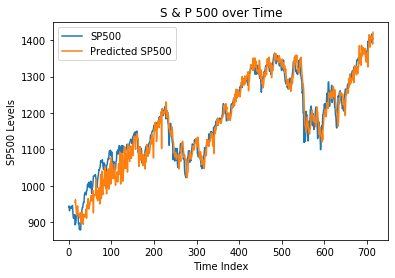

In [0]:
# Plot first 700 predictions
#pred = np.load("pred2.npy")
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[15:15+700, :] = np.reshape(pred,(-1,1))[:700]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data[:15+700]), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
#plt.savefig('sp500_plt5_1lay.png')

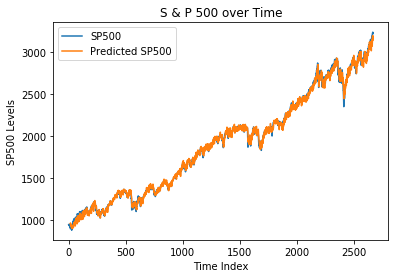

In [0]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[10+look_back:len(data), :] = np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
plt.savefig('sp500_plt5_1lay.png')

Text(0.5, 1.0, 'S & P 500 over Time')

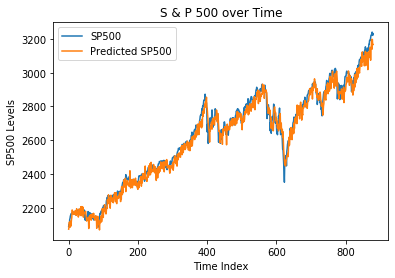

In [0]:
# Plot last 880 predictions
testPredictPlot = np.empty_like(data[1786:])
testPredictPlot[:, :] = np.reshape(pred,(-1,1))[len(pred)-880:]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data[1786:]), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")